In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras as keras
import matplotlib.pyplot as plt

In [2]:
digits = pd.read_csv('../data/digit_recognizer_train.csv')

In [3]:
X = digits.iloc[:, 1:]
y = digits.iloc[:, 0]

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [5]:
some_digit = X_train.loc[6635]
some_digit_image = some_digit.values.reshape(28, 28)

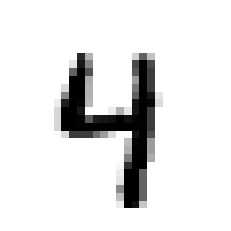

In [6]:
from  matplotlib.cm import  binary
#plt.figure(figsize=(10,10))
plt.imshow(some_digit_image, cmap = binary,
           interpolation="nearest")
plt.axis("off")
plt.show()

In [7]:
print(y_train.loc[6635])

4


In [8]:
from sklearn.preprocessing import StandardScaler
X_train = X_train.astype(np.float64)
X_test = X_test.astype(np.float64)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### y variable one-hot conversion

In [9]:
y_train_cat = keras.utils.to_categorical(y_train, num_classes=10)
y_test_cat = keras.utils.to_categorical(y_test, num_classes=10)

In [10]:
type(y_train_cat)

numpy.ndarray

In [11]:
y_train_cat.dtype

dtype('float32')

In [12]:
y_train_cat.shape

(37800, 10)

In [13]:
y_train_cat[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [14]:
y_train[:5]

22460    8
20828    5
32032    6
6194     2
12768    2
Name: label, dtype: int64

### Reshape X variable to 3D

In [15]:
img_rows, img_cols = 28, 28

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

In [16]:
X_train.shape

(37800, 28, 28, 1)

In [17]:
X_test.shape

(4200, 28, 28, 1)

### Build CNN model with keras

In [18]:
batch_size = 16
epochs = 10

In [19]:
#from keras.layers import Conv2D as Conv2D

In [20]:
cnn_model = keras.Sequential()

cnn_model.add(keras.layers.Conv2D(input_shape=(28, 28, 1), activation=tf.nn.relu, filters=3, \
                     kernel_size=3, strides=1, padding='valid'))

cnn_model.add(keras.layers.Conv2D(activation=tf.nn.relu, filters=6, \
                     kernel_size=5, strides=1, padding='valid'))

cnn_model.add(keras.layers.Conv2D(activation=tf.nn.relu, filters=12, \
                     kernel_size=7, strides=1, padding='valid'))

cnn_model.add(keras.layers.Conv2D(activation=tf.nn.relu, filters=24, \
                     kernel_size=9, strides=1, padding='valid'))

cnn_model.add(keras.layers.Flatten())
cnn_model.add(keras.layers.Dense(216, activation='relu'))
#cnn_model.add(Dropout(rate=0.5))
cnn_model.add(keras.layers.Dense(108, activation='relu'))
cnn_model.add(keras.layers.Dense(10, activation='softmax'))

In [21]:
optimizer = keras.optimizers.Adam(lr=0.0001)

# look for monitor values at https://keras.io/callbacks/
#learning_rate_reduction = keras.callbacks.ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

data_augmentor = keras.preprocessing.image.ImageDataGenerator(
            rotation_range=10,
            zoom_range=0.1,
            width_shift_range=0.1,
            height_shift_range=0.1)

# propar values for loss are present at https://keras.io/losses/
cnn_model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])

history = cnn_model.fit(data_augmentor.flow(X_train, y_train_cat, batch_size=16), epochs=epochs,
                                    validation_data=(X_test, y_test_cat), verbose=1,
                                    steps_per_epoch=X_train.shape[0]//batch_size)

  ...
    to  
  ['...']
Train for 2362 steps, validate on 4200 samples
Epoch 1/10
2362/2362 [==============================] - 84s 35ms/step - loss: 0.6599 - accuracy: 0.7859 - val_loss: 0.1533 - val_accuracy: 0.9538
Epoch 2/10
2362/2362 [==============================] - 83s 35ms/step - loss: 0.2607 - accuracy: 0.9199 - val_loss: 0.1061 - val_accuracy: 0.9638
Epoch 3/10
2362/2362 [==============================] - 83s 35ms/step - loss: 0.1875 - accuracy: 0.9413 - val_loss: 0.0944 - val_accuracy: 0.9683
Epoch 4/10
2362/2362 [==============================] - 83s 35ms/step - loss: 0.1559 - accuracy: 0.9518 - val_loss: 0.0722 - val_accuracy: 0.9774
Epoch 5/10
2362/2362 [==============================] - 84s 36ms/step - loss: 0.1325 - accuracy: 0.9585 - val_loss: 0.0629 - val_accuracy: 0.9805
Epoch 6/10
2362/2362 [==============================] - 81s 34ms/step - loss: 0.1158 - accuracy: 0.9638 - val_loss: 0.0615 - val_accuracy: 0.9807
Epoch 7/10
2362/2362 [==============================

In [22]:
save_model_json(cnn_model, 'first_keras_model')

NameError: name 'save_model_json' is not defined

In [ ]:
save_model_h5(cnn_model, 'first_keras_model')

In [ ]:
some_digit_transformed = some_digit_image.reshape((-1,28,28,1))

In [ ]:
model = load_h5_model('./models/first_keras_model.h5', './models/first_keras_model.json')
#model = load_json_model('./models/model.json')
print("model predict : ",model.predict(some_digit_transformed))
print("model classes : ",model.predict_classes(some_digit_transformed))

### Save model as h5.

In [ ]:
#from keras.models import load_model

#model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'

#model = load_model('my_model.h5')